In [37]:
# Check the shape of the DataFrame
print(df.shape)



(10000, 13)


Missing Values:
 City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64
Descriptive Statistics:
               PM2.5          PM10           NO2           SO2            CO  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      77.448439    104.438161     52.198649     25.344490      5.047984   
std       41.927871     55.062396     27.320490     14.091194      2.852625   
min        5.020000     10.000000      5.010000      1.000000      0.100000   
25%       41.185000     57.137500     28.347500     13.190000      2.560000   
50%       77.725000    103.690000     52.100000     25.350000      5.090000   
75%      113.392500    152.265000     75.705000     37.500000      7.480000   
max      149.980000    200.000000    100.000000     49.990000     10.000000   

                 O3  Temperat

C:\Users\Musta\AppData\Local\Temp\ipykernel_3320\1124610346.py:53: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


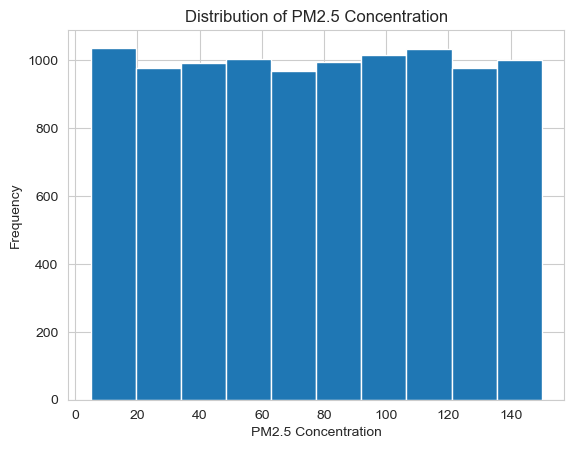

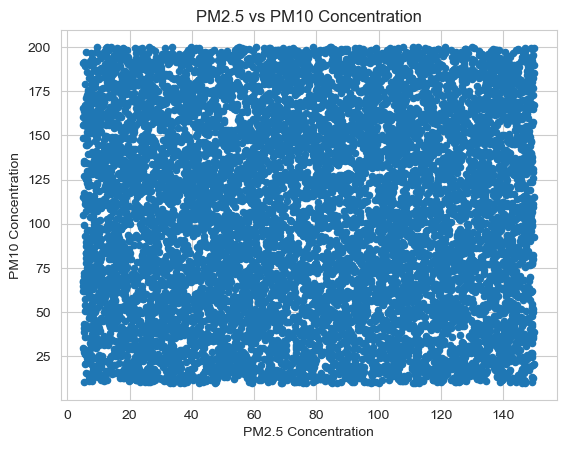

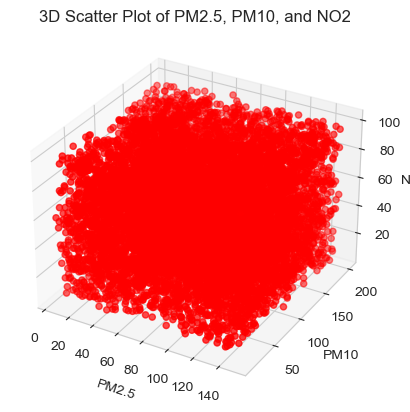

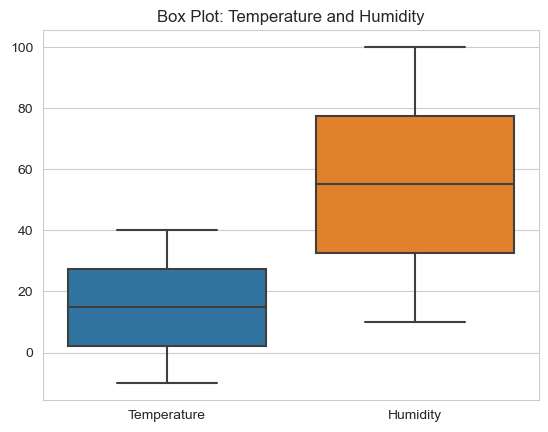

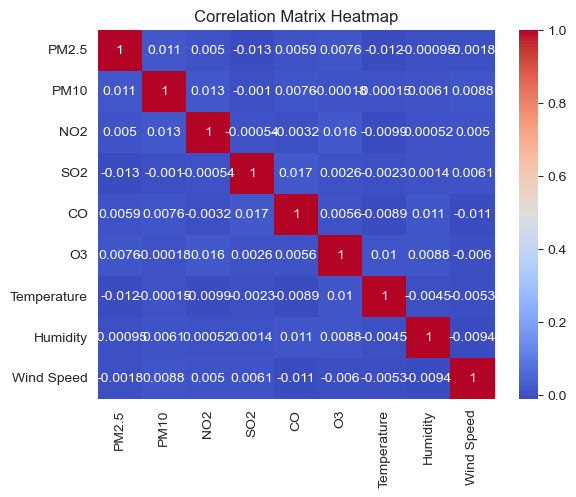

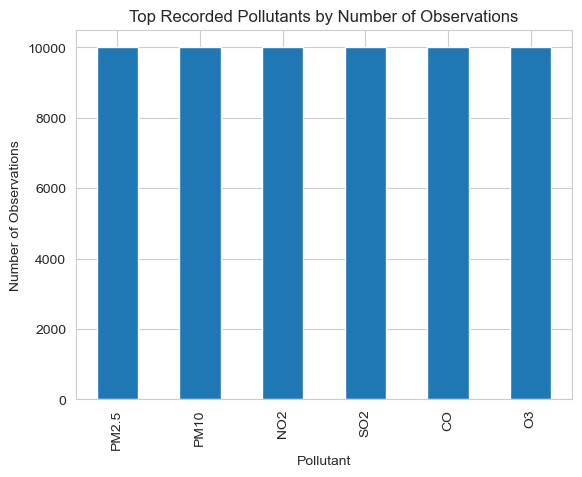

Hour with highest PM2.5: 0 am
Hour with lowest PM2.5: 0 am


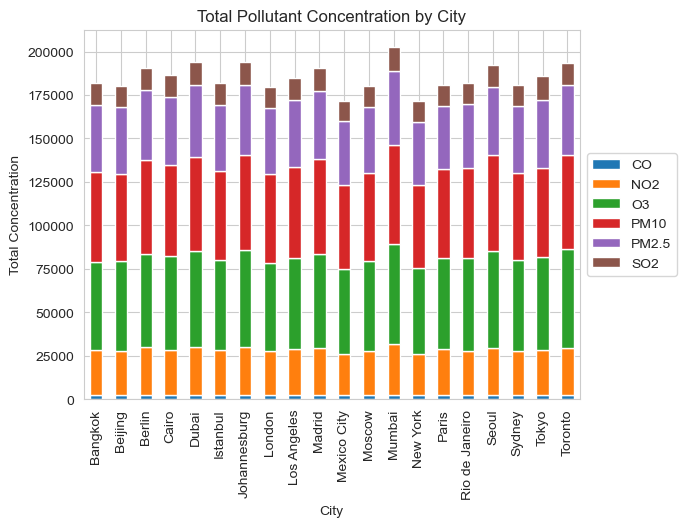

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data_path = 'C:/Users/Musta/OneDrive/Desktop/global-air-quality-dataset/'  # Update with your actual path
df = pd.read_csv(data_path + 'global_air_quality_data_10000.csv')

# 1. Data Cleaning
# Handling Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Removing Duplicates
df.drop_duplicates(inplace=True)

# Converting Data Types
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Trimming Whitespaces (for City and Country names)
df['City'] = df['City'].str.strip()
df['Country'] = df['Country'].str.strip()

# Correcting Categorical Data (Example: Convert Country names to uppercase)
df['Country'] = df['Country'].str.upper()

# 2. Data Analysis
# Descriptive Statistics
summary = df.describe()
print("Descriptive Statistics:\n", summary)

# Calculating Central Tendency for PM2.5
mean_pm25 = df['PM2.5'].mean()
median_pm25 = df['PM2.5'].median()
mode_pm25 = df['PM2.5'].mode()[0]
print(f"PM2.5 - Mean: {mean_pm25}, Median: {median_pm25}, Mode: {mode_pm25}")

# Range, Variance, Standard Deviation for PM2.5
range_pm25 = df['PM2.5'].max() - df['PM2.5'].min()
variance_pm25 = df['PM2.5'].var()
std_dev_pm25 = df['PM2.5'].std()
print(f"PM2.5 - Range: {range_pm25}, Variance: {variance_pm25}, Standard Deviation: {std_dev_pm25}")

# Count and Percentiles for PM2.5
count_pm25 = df['PM2.5'].count()
percentiles_pm25 = np.percentile(df['PM2.5'], [25, 50, 75])
iqr_pm25 = percentiles_pm25[2] - percentiles_pm25[0]
print(f"PM2.5 - Count: {count_pm25}, Percentiles: {percentiles_pm25}, IQR: {iqr_pm25}")

# Correlation Matrix
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# 3. Data Visualization
# Histogram for PM2.5
df['PM2.5'].hist()
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.title('Distribution of PM2.5 Concentration')
plt.show()

# 2D Scatter Plot of PM2.5 vs PM10
df.plot(kind='scatter', x='PM2.5', y='PM10')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('PM10 Concentration')
plt.title('PM2.5 vs PM10 Concentration')
plt.show()

# 3D Scatter Plot for PM2.5, PM10, and NO2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['PM2.5'], df['PM10'], df['NO2'], c='r', marker='o')
ax.set_xlabel('PM2.5')
ax.set_ylabel('PM10')
ax.set_zlabel('NO2')
plt.title('3D Scatter Plot of PM2.5, PM10, and NO2')
plt.show()

# Box Plot for Temperature and Humidity
sns.boxplot(data=df[['Temperature', 'Humidity']])
plt.title('Box Plot: Temperature and Humidity')
plt.show()

# Heatmap of Correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 4. Additional Visualizations
# Comparing the Number of Observations for Each Pollutant
pollutant_counts = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].count()
pollutant_counts.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Pollutant')
plt.ylabel('Number of Observations')
plt.title('Top Recorded Pollutants by Number of Observations')
plt.show()



# 5. Hour with Highest and Lowest Average PM2.5 Concentration
df['hour_of_day'] = df['Date'].dt.hour
hourly_pm25 = df.groupby('hour_of_day')['PM2.5'].mean()
max_pm25_hour = hourly_pm25.idxmax()
print("Hour with highest PM2.5:", max_pm25_hour, 'am') if max_pm25_hour < 12 else print("Hour with highest PM2.5:", abs(max_pm25_hour - 12), 'pm')
min_pm25_hour = hourly_pm25.idxmin()
print("Hour with lowest PM2.5:", min_pm25_hour, 'am') if min_pm25_hour < 12 else print("Hour with lowest PM2.5:", abs(min_pm25_hour - 12), 'pm')

# 6. Total Pollutant Concentration by City (Stacked Bar)
# Melt the DataFrame to long format
df_long = df.melt(id_vars='City', value_vars=['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3'], 
                   var_name='Pollutant', value_name='Concentration')

# Pivot the melted DataFrame
df_pivot = df_long.pivot_table(index='City', columns='Pollutant', values='Concentration', aggfunc='sum')

# Plotting
df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Total Concentration')
plt.title('Total Pollutant Concentration by City')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
